<a href="https://colab.research.google.com/github/ViniciusNarcisoFernandes/Potencial-Barrier/blob/main/Potencial_Barreira_E_%3E_V0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R = [0.6732258510077369, 0.6690278255117614, 0.6647993073505452, 0.6605406150609572, 0.6562520825906446, 0.6519340593910888, 0.6475869104987765, 0.6432110166040613, 0.6388067741073197, 0.634374595161983, 0.6299149077040752, 0.6254281554678605, 0.6209147979872631, 0.6163753105826817, 0.6118101843328767, 0.6072199260316252, 0.6026050581288251, 0.597966118655777, 0.5933036611343939, 0.5886182544700792, 0.5839104828280889, 0.5791809454931542, 0.5744302567122281, 0.5696590455201993, 0.5648679555484641, 0.5600576448162757, 0.5552287855048195, 0.5503820637139766, 0.5455181792017911, 0.5406378451066807, 0.5357417876524466, 0.5308307458361986, 0.5259054710993183, 0.5209667269816459, 0.5160152887590637, 0.5110519430647463, 0.5060774874943293, 0.5010927301952924, 0.49609848944092605, 0.4910955931892221, 0.4860848786271189, 0.48106719170052753, 0.4760433866306195, 0.47101432541687815, 0.46598087732745497, 0.4609439183773909, 0.4559043307953123, 0.45086300247921357, 0.4458208264419998, 0.4407787002

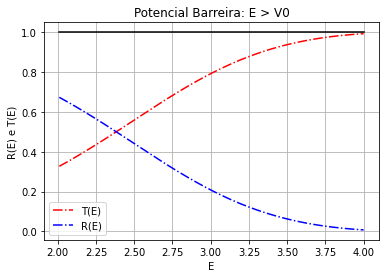

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes:
m_e = 9.10938356 * 10**(-31)
hbar1 = 1.0545718 * 10**(-14)
hbar2 = 6.58211915 * 10**(-16)
hbar = hbar1*hbar2

# Energia inicial e final:
Ei = 2 ; Ef = 4

# Tamanho da Barreira:
a = 4

# Potencial da Barreira:
V0 = 2

# Listas:
E = list() ; R = list() ; T = list() ; RT = list()

for i in np.arange(Ei+0.01,Ef,0.01):

  # Número de onda:
  k1 = np.sqrt(2*m_e*(i)/hbar)
  k2 = np.sqrt((2*m_e*(i-V0))/hbar)

  # Matriz A:
  A = np.zeros((4,4),dtype = np.cdouble)

  # Primeira linha:
  A[0,0] = 1 ; A[0,1] = -1 ; A[0,2] = -1
  # Segunda linha:
  A[1,1] = np.exp(1j*k2*a) ; A[1,2] = np.exp(-1j*k2*a) ; A[1,3] = -np.exp(1j*k1*a)
  # Terceira linha:
  A[2,0] = -k1 ; A[2,1] = -k2 ; A[2,2] = k2
  # Quarta linha:
  A[3,1] = k2*np.exp(1j*k2*a) ; A[3,2] = -k2*np.exp(-1j*k2*a) ; A[3,3] = -k1*np.exp(1j*k1*a)

  # Matriz b:
  b = np.zeros((4,1),dtype = np.cdouble)
  b[0,0] = -1 ; b[2,0] = -k1

  # Solução do sistema linear:
  x = np.linalg.solve(A,b)

  # Índice de Reflexão:
  R1 = x[0,0]*np.conj(x[0,0])
  R.append(R1.real)

  # Índice de Transmissão:
  T1 = x[3,0]*np.conj(x[3,0])
  T.append(T1.real)

  # Energia:
  E.append(i)

  # Somando os índices:
  RT.append((R1+T1).real)

# Valores do índice de reflexão:
print('R =',R)

# Valores do índice de transmissão:
print('T =',T)

# Plot:
plt.figure()
plt.plot(E,T,color='red',linestyle='-.',label='T(E)')
plt.plot(E,R,color='Blue',linestyle='-.',label='R(E)')
plt.plot(E,RT,color='Black',linestyle='-')
plt.xlabel('E')
plt.ylabel('R(E) e T(E)')
plt.title('Potencial Barreira: E > V0')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()